In [5]:
#모듈 임포트!
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras import datasets

In [6]:
#데이터 shpae 확인
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


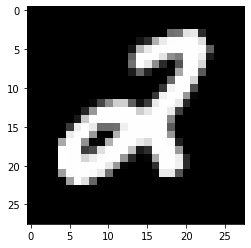

2
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  112 118 225 232  44   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  19  45 175 234
  252 253 253 253 222   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  21 184 231 253 253
  253 253 253 253 250  98   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  99 253 253 253 226
  142 124 253 253 237  28   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 114 253 231 140  42
    0  83 253 253 214   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  28 103 

In [7]:
my_sample = np.random.randint(60000)
#X_train의 형태는 28 * 28
plt.imshow(X_train[my_sample], cmap = 'gray')
plt.show()

print(Y_train[my_sample])
print(X_train[my_sample])

#0~250까지 값(색상을 나타냄)이 28개로 표현 즉, 픽셀 값임
#imshow가 임의로 색을 입혀줌
#28 X 28 2차원데이터로 표현

In [8]:
#타겟을 원핫인코딩 이용하여 라벨을 10개짜리로 변환

y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [9]:
#원핫인코딩 형태로 변환한 것 확인
print(Y_train[5000])
print(y_train[5000])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# 모델 예시

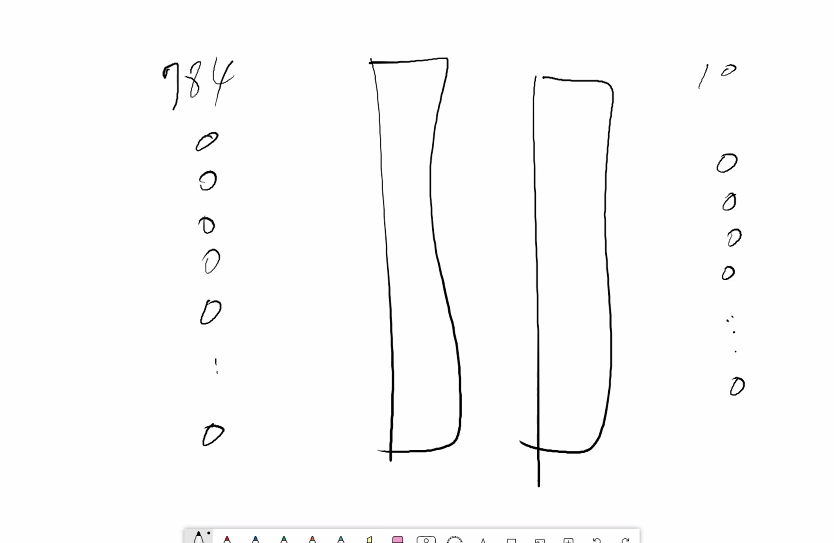

In [10]:
#훈련용 데이터를 reshape하기 (28 * 28 = 784)
#추후에 그림을 그리기 위해서는 기존 형식인 28 * 28이 존재해야하는데 그러므로 새로운 변수에 1, 756으로 reshape한 데이터를 저장
x_train = X_train.reshape(-1, 28 * 28)
x_test = X_test.reshape(-1, 28 * 28)

# 픽셀값이 0-255개 사이에 있어서 나누면 최솟값, 최댓값을 0-1사이 값으로 바꿀수 있는데 이는, MinMaxScaler로 해준것과 같다.
#255로 나누면 색이 안 나옴
x_train = x_train / 255
x_test = x_test / 255

print(x_train.shape)

(60000, 784)


# 직접 생성한 모델

In [16]:
#모델 생성

model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))

model.add(Dense(256, activation = 'relu'))

model.add(Dense(128, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

In [17]:
opt = Adam(lr = 0.001)
#다중분류기에서는 loss로 categorical_crossentropy
model.compile(opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [18]:
#모델 학습
fit_hist = model.fit(x_train, y_train, batch_size = 5, epochs = 5, verbose = 1)

Epoch 1/5
12000/12000 [==============================] - 51s 4ms/step - loss: 0.2192 - accuracy: 0.9358
Epoch 2/5
12000/12000 [==============================] - 51s 4ms/step - loss: 0.1150 - accuracy: 0.9676
Epoch 3/5
12000/12000 [==============================] - 52s 4ms/step - loss: 0.0915 - accuracy: 0.9755
Epoch 4/5
12000/12000 [==============================] - 51s 4ms/step - loss: 0.0779 - accuracy: 0.9797
Epoch 5/5
12000/12000 [==============================] - 52s 4ms/step - loss: 0.0727 - accuracy: 0.9816


In [19]:
#정확도 확인
score = model.evaluate(x_test, y_test, verbose = 0)
print('Final test set accuracy : ', score[1])

Final test set accuracy :  0.9732999801635742


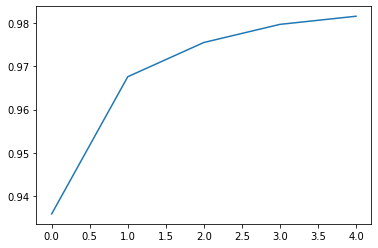

In [20]:
#시각화

plt.plot(fit_hist.history['accuracy'])
plt.show()

# 강사님과 한 코드

In [41]:
#모델 생성

model = Sequential()
model.add(Dense(128, input_dim = 784, activation = 'relu'))

# model.add(Dense(128, activation = 'relu'))

model.add(Dense(128, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

In [42]:
opt = Adam(lr = 0.001)
#다중분류기에서는 loss로 categorical_crossentropy
model.compile(opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [43]:
#모델 학습
fit_hist = model.fit(x_train, y_train, batch_size = 218, epochs = 15, validation_split = 0.2, verbose = 1)

Epoch 1/15
221/221 [==============================] - 2s 7ms/step - loss: 0.4328 - accuracy: 0.8822 - val_loss: 0.1948 - val_accuracy: 0.9441
Epoch 2/15
221/221 [==============================] - 1s 6ms/step - loss: 0.1671 - accuracy: 0.9506 - val_loss: 0.1380 - val_accuracy: 0.9607
Epoch 3/15
221/221 [==============================] - 1s 6ms/step - loss: 0.1187 - accuracy: 0.9653 - val_loss: 0.1361 - val_accuracy: 0.9597
Epoch 4/15
221/221 [==============================] - 1s 6ms/step - loss: 0.0919 - accuracy: 0.9724 - val_loss: 0.1125 - val_accuracy: 0.9663
Epoch 5/15
221/221 [==============================] - 1s 6ms/step - loss: 0.0717 - accuracy: 0.9783 - val_loss: 0.0971 - val_accuracy: 0.9707
Epoch 6/15
221/221 [==============================] - 1s 6ms/step - loss: 0.0579 - accuracy: 0.9828 - val_loss: 0.0958 - val_accuracy: 0.9715
Epoch 7/15
221/221 [==============================] - 1s 6ms/step - loss: 0.0460 - accuracy: 0.9868 - val_loss: 0.0871 - val_accuracy: 0.9726
Epoch 

In [44]:
#정확도 확인
score = model.evaluate(x_test, y_test, verbose = 0)
print('Final test set accuracy : ', score[1])

Final test set accuracy :  0.9771999716758728


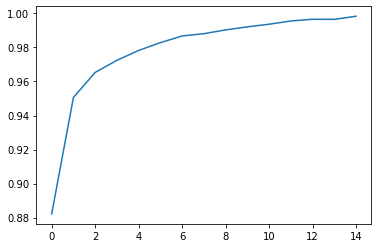

In [45]:
#시각화

plt.plot(fit_hist.history['accuracy'])
plt.show()

# 모델 사이즈를 키우면 정확도가 조금 더 향상 될 수 있음

1
[[1.0311169e-08 9.9989629e-01 2.9931616e-07 8.1300783e-08 8.0989776e-06
  1.3921951e-07 1.3048501e-07 7.7938639e-05 1.5596515e-05 1.2930993e-06]]
1


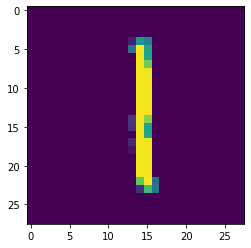

In [86]:
#sample 데이터로 test

my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample])

print(Y_test[my_sample])

pred = model.predict(x_test[my_sample].reshape(-1, 784))

print(pred)
print(np.argmax(pred))